In [260]:
import pandas as pd
import matplotlib.pyplot as plt

In [261]:
games = pd.read_csv("steam.csv")

games.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [262]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27074 non-null  object 
 5   publisher         27061 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

# Data Exploration, Filtering, and Feature Engineering

## 1. English vs. Non-english Games

In [263]:
games['english'].value_counts()

english
1    26564
0      511
Name: count, dtype: int64

Text(0.5, 1.0, 'Percentage of English vs. Non-English Games')

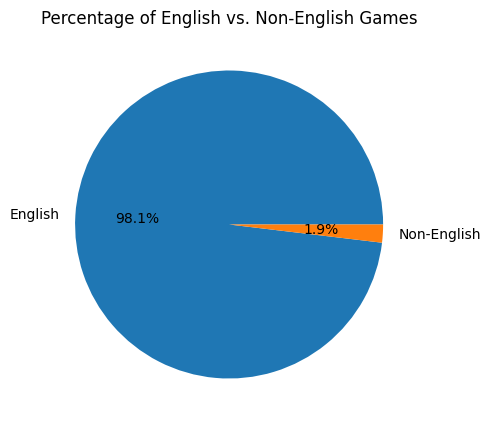

In [264]:
# Visualize proportion of english games
english_labels = ['English', 'Non-English']
english_data = games['english'].value_counts(normalize=True).values

fig, ax = plt.subplots(figsize=(10,5))
ax.pie(english_data, labels=english_labels, autopct='%1.1f%%')

ax.set_title('Percentage of English vs. Non-English Games')

In [265]:
# Filtering 1: only enlgish games
games = games.loc[games['english'] == 1]
games.shape

(26564, 18)

## 2. Number of Games in Different Platforms

In [266]:
games['platforms'].value_counts()

platforms
windows              17938
windows;mac;linux     4607
windows;mac           3406
windows;linux          608
mac                      3
mac;linux                1
linux                    1
Name: count, dtype: int64

In [267]:
# Percentage of games supporting each platform
platform_labels = ['windows', 'mac', 'linux']

platform_counts = {}
for platform in platform_labels:
    platform_counts[platform] = len(games.loc[games['platforms'].str.contains(platform)])/len(games)*100

platform_counts

{'windows': 99.981177533504,
 'mac': 30.17994277970185,
 'linux': 19.639361541936456}

Text(0, 0.5, 'Percentage out of Total Number of Games')

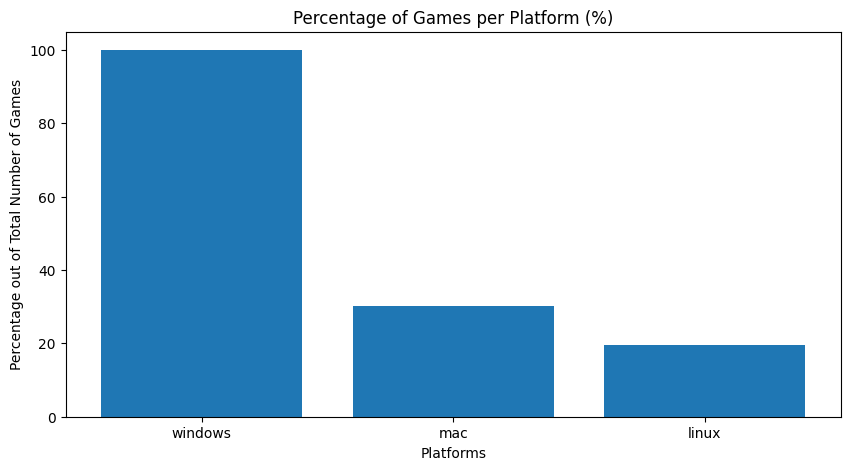

In [268]:
# Visualize percentage of games supporting each platform
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(platform_labels, list(platform_counts.values()))
ax.set_title('Percentage of Games per Platform (%)')
ax.set_xlabel('Platforms')
ax.set_ylabel('Percentage out of Total Number of Games')

In [269]:
# Filtering 2: games supporting windows
games = games[games['platforms'].str.contains('windows')]
games['platforms'].value_counts()

platforms
windows              17938
windows;mac;linux     4607
windows;mac           3406
windows;linux          608
Name: count, dtype: int64

## 3. Distribution of Game Prices

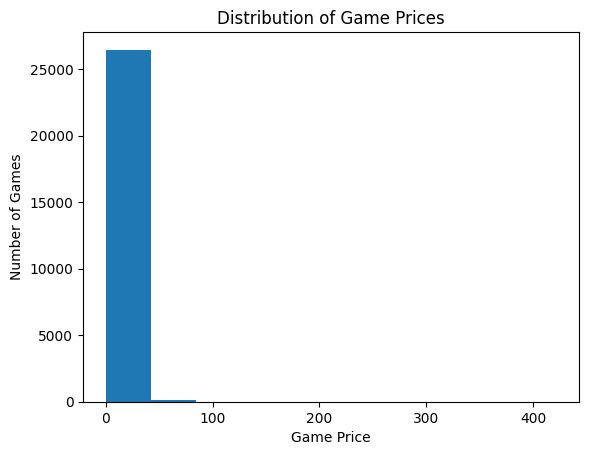

In [270]:
# Visualize distribution of prices per unit
plt.hist(games['price'])
plt.title('Distribution of Game Prices')
plt.xlabel('Game Price')
plt.ylabel('Number of Games')
plt.show()

In [272]:
# Filtering - remove free games, and games more expensive than $100
games = games.loc[(games['price'] > 0) & (games['price'] <= 100)]
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24083 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             24083 non-null  int64  
 1   name              24083 non-null  object 
 2   release_date      24083 non-null  object 
 3   english           24083 non-null  int64  
 4   developer         24082 non-null  object 
 5   publisher         24073 non-null  object 
 6   platforms         24083 non-null  object 
 7   required_age      24083 non-null  int64  
 8   categories        24083 non-null  object 
 9   genres            24083 non-null  object 
 10  steamspy_tags     24083 non-null  object 
 11  achievements      24083 non-null  int64  
 12  positive_ratings  24083 non-null  int64  
 13  negative_ratings  24083 non-null  int64  
 14  average_playtime  24083 non-null  int64  
 15  median_playtime   24083 non-null  int64  
 16  owners            24083 non-null  object 
 17

## 4. Different Genres of Games

In [273]:
games['genres'].value_counts()

genres
Action;Indie                                                                 1791
Casual;Indie                                                                 1425
Action;Adventure;Indie                                                       1194
Adventure;Indie                                                              1107
Action;Casual;Indie                                                           977
                                                                             ... 
Action;Casual;Free to Play;Indie;RPG;Simulation;Strategy                        1
Nudity;Adventure;Casual                                                         1
Sexual Content;Simulation                                                       1
Action;Adventure;Indie;Massively Multiplayer;Racing;Simulation                  1
Action;Adventure;Casual;Free to Play;Indie;RPG;Simulation;Sports;Strategy       1
Name: count, Length: 1135, dtype: int64

### Feature Engineering 1: Encode different genres

In [276]:
# reset index
games = games.reset_index().drop("index", axis=1)
games.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [277]:
# Spliting the genres into a list
games['genres'] = games['genres'].str.split(";")

In [278]:
# label each genre into a separate column
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
binary_genres = mlb.fit_transform(games['genres'])

genre_names = list(mlb.classes_)

genres_encoded = pd.DataFrame(binary_genres, columns=genre_names)
games_merged = pd.concat([games, genres_encoded], axis=1)

games_merged.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,...,Sexual Content,Simulation,Software Training,Sports,Strategy,Tutorial,Utilities,Video Production,Violent,Web Publishing
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,[Action],...,0,0,0,0,0,0,0,0,0,0
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,[Action],...,0,0,0,0,0,0,0,0,0,0
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,[Action],...,0,0,0,0,0,0,0,0,0,0
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,[Action],...,0,0,0,0,0,0,0,0,0,0
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,[Action],...,0,0,0,0,0,0,0,0,0,0


In [279]:
# genre counts
genre_count = {}
for genre in genre_names:
    genre_count[genre] = len(games_merged.loc[games_merged[genre] == 1])

# top 5 genres with most number of games
top_5_genres = [genre[0] for genre in sorted(genre_count.items(), key=lambda x: x[1], reverse=True)[:5]]
top_5_genres

['Indie', 'Action', 'Casual', 'Adventure', 'Simulation']

In [325]:
# Sort and normalize the counts
top_5_genres = sorted(genre_count.items(), key=lambda x: x[1], reverse=True)[:5]
total_counts = len(games_merged)
top_5_genre_counts = {item[0]: item[1]/total_counts*100 for item in top_5_genres}

Text(0.5, 1.0, 'Percentage of Games in Top 5 Most Popular Genres')

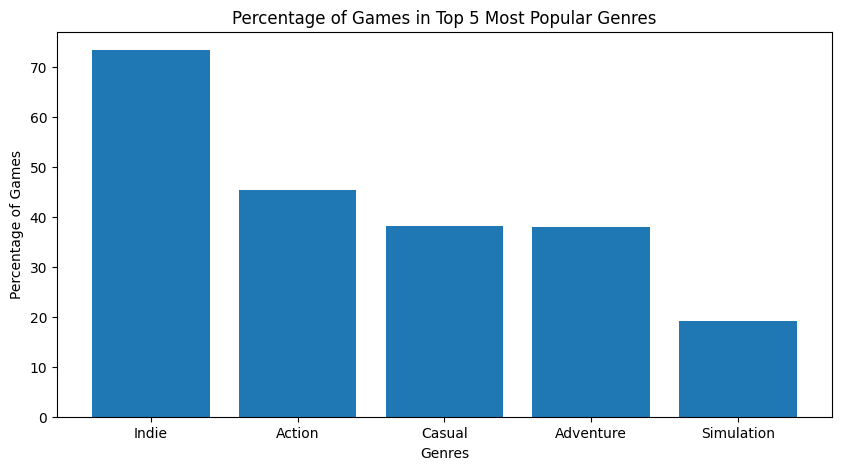

In [327]:
# Visualize 
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(top_5_genre_counts.keys(), top_5_genre_counts.values())
ax.set_xlabel('Genres')
ax.set_ylabel('Percentage of Games')
ax.set_title('Percentage of Games in Top 5 Most Popular Genres')

## 5. Ratings and Sales

### Feature Engineering 2: Create `rating_num`, `positive_ratio`, `sales_average` columns

In [282]:
# Create positive_ratio column (proportion of number of positive ratings to total number of ratings)
def get_rating_ratio(df):
    df['rating_num'] = df['positive_ratings'] + df['negative_ratings']
    df['positive_ratio'] = df['positive_ratings'] / df['rating_num']

In [283]:
# Calculate low and high sales range
def get_low_high_sales(df):
    df[['owners_low', 'owners_high']] = df['owners'].str.split("-", expand=True).astype(int)
    df['sales_low'] = df['owners_low'] * df['price']
    df['sales_high'] = df['owners_high'] * df['price']


In [284]:
# Calculate average sales between low and high sales range
def get_average_sales(df):
    df['sales_average'] = (df['sales_high'] + df['sales_low'])/2

In [285]:
get_rating_ratio(games_merged)
get_low_high_sales(games_merged)
get_average_sales(games_merged)
games_merged.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,...,Video Production,Violent,Web Publishing,rating_num,positive_ratio,owners_low,owners_high,sales_low,sales_high,sales_average
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,[Action],...,0,0,0,127873,0.973888,10000000,20000000,71900000.0,143800000.0,107850000.0
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,[Action],...,0,0,0,3951,0.839787,5000000,10000000,19950000.0,39900000.0,29925000.0
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,[Action],...,0,0,0,3814,0.895648,5000000,10000000,19950000.0,39900000.0,29925000.0
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,[Action],...,0,0,0,1540,0.826623,5000000,10000000,19950000.0,39900000.0,29925000.0
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,[Action],...,0,0,0,5538,0.947996,5000000,10000000,19950000.0,39900000.0,29925000.0


### Remove outliers from `sales_average` columns

In [286]:
import numpy as np
from scipy import stats

games_merged = games_merged[(np.abs(stats.zscore(games_merged['sales_average'])) < 3)]
games_merged.shape


(23958, 54)

In [287]:
# reset index
games_merged = games_merged.reset_index().drop("index", axis=1)

In [288]:
games_merged['sales_average'].describe()

count    2.395800e+04
mean     7.136054e+05
std      3.166173e+06
min      7.200000e+03
25%      2.890000e+04
50%      6.965000e+04
75%      1.549000e+05
max      4.498500e+07
Name: sales_average, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x281fffa60>,
 'caps': [<matplotlib.lines.Line2D at 0x281ffffa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x281fff7c0>],
 'medians': [<matplotlib.lines.Line2D at 0x281f88520>],
 'fliers': [<matplotlib.lines.Line2D at 0x281f887c0>],
 'means': []}

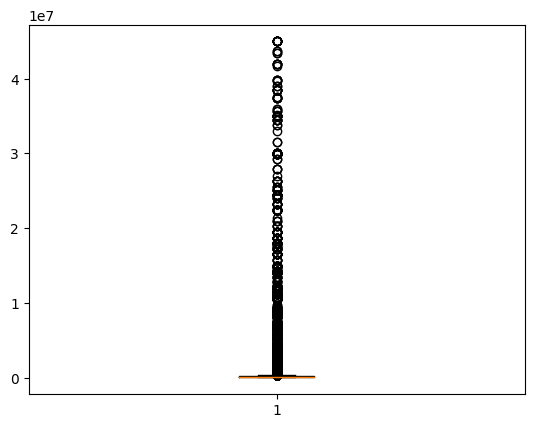

In [289]:
plt.boxplot(games_merged['sales_average'])

(array([2.3106e+04, 3.9800e+02, 1.4700e+02, 1.0300e+02, 6.4000e+01,
        3.9000e+01, 3.4000e+01, 2.5000e+01, 2.1000e+01, 2.1000e+01]),
 array([7.200000e+03, 4.504980e+06, 9.002760e+06, 1.350054e+07,
        1.799832e+07, 2.249610e+07, 2.699388e+07, 3.149166e+07,
        3.598944e+07, 4.048722e+07, 4.498500e+07]),
 <BarContainer object of 10 artists>)

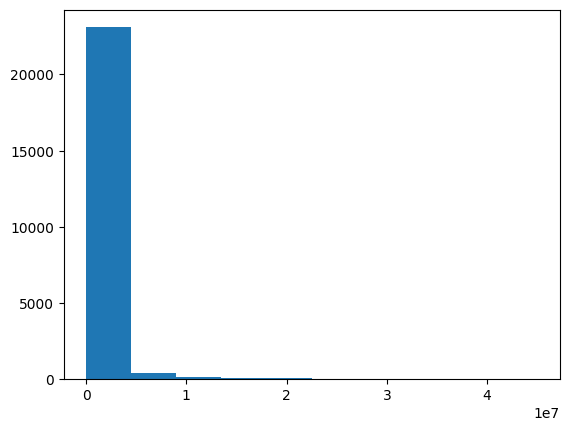

In [290]:
plt.hist(games_merged['sales_average'])

The `sales_average` column is already a calcualted variable from low and high points of owners multiplied by unit price. Since it is a calculated variable, it is binned to different levels of sales. This can also help with business interpretability.

## Categorize `sales_average` column into `low`, `medium`, and `high`

In [291]:
# 3 bins (25 and 75th percentiles)

low_25 = games_merged['sales_average'].describe()[4]
top_25 = games_merged['sales_average'].describe()[6]

# define cutoff values 
bins = [games_merged['sales_average'].min(), low_25, top_25, games_merged['sales_average'].max()]

# define labels
labels = ['low', 'medium', 'high']

# categorize sales_average
games_merged['sales_category'] = pd.cut(games_merged['sales_average'], bins=bins, labels=labels)

In [292]:
games_merged.loc[games_merged['sales_category'].isna()]

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,...,Violent,Web Publishing,rating_num,positive_ratio,owners_low,owners_high,sales_low,sales_high,sales_average,sales_category
17005,760740,Polaris,2017-12-20,1,Vyacheslav Notbad,Zotdinex,windows,0,Single-player,[Casual],...,0,0,7,0.571429,0,20000,0.0,14400.0,7200.0,NaN
20939,892910,Space Wars,2018-07-23,1,Star Studios,Star Studios,windows;mac;linux,0,Single-player;Full controller support,"[Action, Casual, Indie]",...,0,0,3,0.666667,0,20000,0.0,14400.0,7200.0,NaN


In [293]:
# Impute these two missing values with appropriate category
games_merged['sales_category'] = games_merged['sales_category'].fillna('low')

games_merged['sales_category'].isna().sum()

0

In [294]:
games_merged['sales_category'].value_counts(normalize=True)

sales_category
medium    0.479172
low       0.273061
high      0.247767
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Percentage of Different Sales Levels')

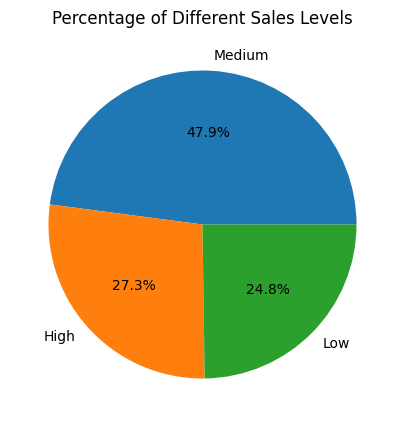

In [295]:
# Visualize proportion of different categories of sales
sales_labels = ['Medium', 'High', 'Low']
sales_data = games_merged['sales_category'].value_counts(normalize=True).values

fig, ax = plt.subplots(figsize=(10,5))
ax.pie(sales_data, labels=sales_labels, autopct='%1.1f%%')

ax.set_title('Percentage of Different Sales Levels')

# Pre-processing Before Classification Models

In [300]:
relevant_columns = ['appid', 'rating_num', 'positive_ratio'] + genre_names
len(relevant_columns)

32

In [301]:
from sklearn.model_selection import train_test_split

X = games_merged[relevant_columns]
y = games_merged['sales_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [303]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [321]:
# Baseline model - DummyClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report

dummy_clf = DummyClassifier(strategy='stratified')
dummy_clf.fit(X_train_smote, y_train_smote)
y_pred_dummy_clf = dummy_clf.predict(X_test)
dummy_clf.score(X_test, y_test)

0.332220367278798

In [322]:
report = classification_report(y_test, y_pred_dummy_clf)
print(report)

              precision    recall  f1-score   support

        high       0.24      0.34      0.28      1469
         low       0.28      0.34      0.31      1636
      medium       0.48      0.33      0.39      2885

    accuracy                           0.34      5990
   macro avg       0.34      0.34      0.33      5990
weighted avg       0.37      0.34      0.34      5990

